In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install mlxtend

   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.3 MB 17.5 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.3 MB 11.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.3 MB 11.8 MB/s eta 0:00:01
   -------------------------- ------------- 8.1/12.3 MB 12.0 MB/s eta 0:00:01
   ---------------------------------- ----- 10.7/12.3 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 11.7 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 12.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 11.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 11.8 MB/s eta 0:00:01
   ------------

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
from pprint import pprint # to get a more easily-readable view.
import re
pd.set_option('display.max_colwidth', None)
from sklearn.linear_model import LinearRegression, HuberRegressor, LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [4]:
avo = pd.read_csv('avocado/avocado_ripeness_dataset.csv')
avo.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [5]:
avo['ripe'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'], 
                                      value = [int(1), int(0), int(0), int(0), int(0)])
avo['preconditioned'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'], 
                                      value = [int(0), int(1), int(0), int(0), int(0)])
avo['hard'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'], 
                                      value = [int(0), int(0), int(1), int(0), int(0)])
avo['breaking'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'], 
                                      value = [int(0), int(0), int(0), int(1), int(0)])
avo['firm-ripe'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'], 
                                      value = [int(0), int(0), int(0), int(0), int(1)])
avo.head()

C:\Users\yorba\AppData\Local\Temp\ipykernel_11072\221436682.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  avo['ripe'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'],
C:\Users\yorba\AppData\Local\Temp\ipykernel_11072\221436682.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  avo['preconditioned'] = avo['ripeness'].replace(to_replace= ['ripe', 'pre-conditioned', 'hard', 'breaking', 'firm-ripe'],
C:\Users\yorba\AppData\Local\Temp\ipykernel_11072\221436682.py:5: FutureWarnin

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripe,preconditioned,hard,breaking,firm-ripe
0,14.5,19,40,26,black,34,175,261,ripe,1,0,0,0,0
1,71.7,53,69,75,green,69,206,185,pre-conditioned,0,1,0,0,0
2,88.5,60,94,46,dark green,79,220,143,hard,0,0,1,0,0
3,93.8,105,87,41,dark green,75,299,140,hard,0,0,1,0,0
4,42.5,303,58,32,purple,63,200,227,breaking,0,0,0,1,0


In [31]:
X = avo[['firmness']]
Y = avo[['ripe']]

In [32]:
Model = LogisticRegression(penalty=None)

In [33]:
Model.fit(X, np.ravel(Y))

c:\Users\yorba\Downloads\jake\data-science\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",None
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass`

In [34]:
print("w1:", Model.coef_)
print("wo:", Model.intercept_)

w1: [[-4.20848816]]
wo: [82.64402772]


In [35]:
probs = Model.predict_proba(X)
print("Probabilities: {}".format(probs))

classes = Model.predict(X)
print("Classes: {}".format(classes))


Probabilities: [[4.07512468e-010 1.00000000e+000]
 [1.00000000e+000 6.98381617e-096]
 [1.00000000e+000 1.37512850e-126]
 [1.00000000e+000 2.82755069e-136]
 [1.00000000e+000 1.63534661e-042]
 [9.22972809e-012 1.00000000e+000]
 [1.00000000e+000 2.00411481e-060]
 [1.00000000e+000 7.40342288e-126]
 [1.00000000e+000 1.47852882e-120]
 [1.00000000e+000 7.69262949e-088]
 [1.00000000e+000 1.18848550e-051]
 [1.00000000e+000 8.18865507e-048]
 [1.00000000e+000 4.30334681e-049]
 [1.00000000e+000 1.02293135e-046]
 [1.00000000e+000 1.46987042e-016]
 [1.00000000e+000 1.67680164e-127]
 [1.00000000e+000 2.35189943e-099]
 [1.00000000e+000 3.49397016e-014]
 [1.00000000e+000 1.15531491e-123]
 [1.00000000e+000 9.74665247e-051]
 [1.00000000e+000 1.40173014e-107]
 [1.00000000e+000 2.86785477e-100]
 [1.00000000e+000 1.17178284e-087]
 [1.00000000e+000 1.12772933e-125]
 [2.24763440e-007 9.99999775e-001]
 [1.79925140e-008 9.99999982e-001]
 [1.89782861e-002 9.81021714e-001]
 [0.00000000e+000 1.00000000e+000]
 [2.8

In [36]:
Model.predict(X)[0:6]


array([1, 0, 0, 0, 0, 1])

In [37]:
Model.score(X, np.ravel(Y))

1.0

c:\Users\yorba\Downloads\jake\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'ripeness')

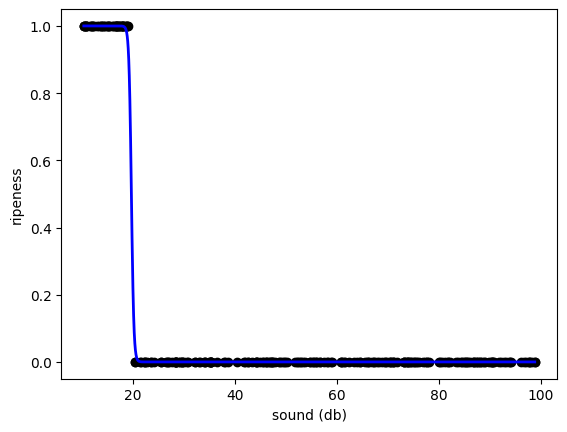

In [38]:
plt.scatter(X,Y, color = 'black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = Model.predict(X).reshape(-1,1).astype(int)
yprob = Model.predict_proba(xrange.reshape(-1,1))[:,1]

plt.plot(xrange, yprob, color="blue", linewidth= 2)
plt.xlabel("sound (db)")
plt.ylabel("ripeness")


In [61]:
X = avo[["firmness", "sound_db"]]

In [62]:
Model.fit(X, np.ravel(Y))
print('w1, w2:', Model.coef_)
print('w0', Model.intercept_)

w1, w2: [[-3.52064135 -0.87395891]]
w0 [108.7146462]


c:\Users\yorba\Downloads\jake\data-science\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [63]:
Model.score(X,Y)

1.0

c:\Users\yorba\Downloads\jake\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


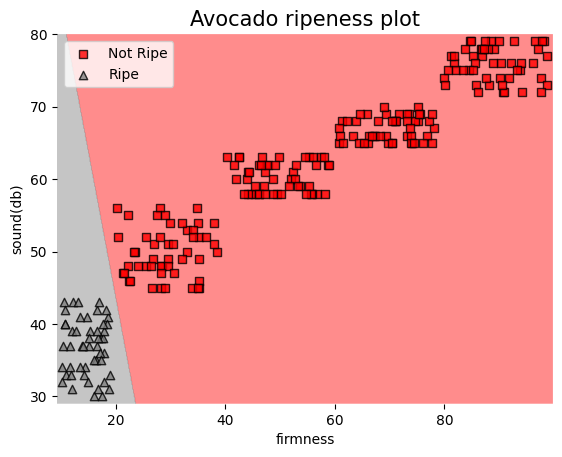

In [64]:
contourf_kwargs = {'alpha': 0.2}

p= plot_decision_regions(X.to_numpy(),np.ravel(Y), clf=Model, contour_kwargs=contourf_kwargs, colors = 'red,gray')

p.set_title('Avocado ripeness plot', fontsize = 15)
p.set_xlabel('firmness', fontsize = 10)
p.set_ylabel('sound(db)', fontsize = 10)

L = plt.legend()
L.get_texts()[0].set_text("Not Ripe")
L.get_texts()[1].set_text("Ripe")